# 5. Regression ( Bonston house cost )

In [1]:
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 dataframe 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# boston 데이터 세트의 target 배열은 주택 가격임. 이를 Price 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#DF Boston 결손값 확인
bostonDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


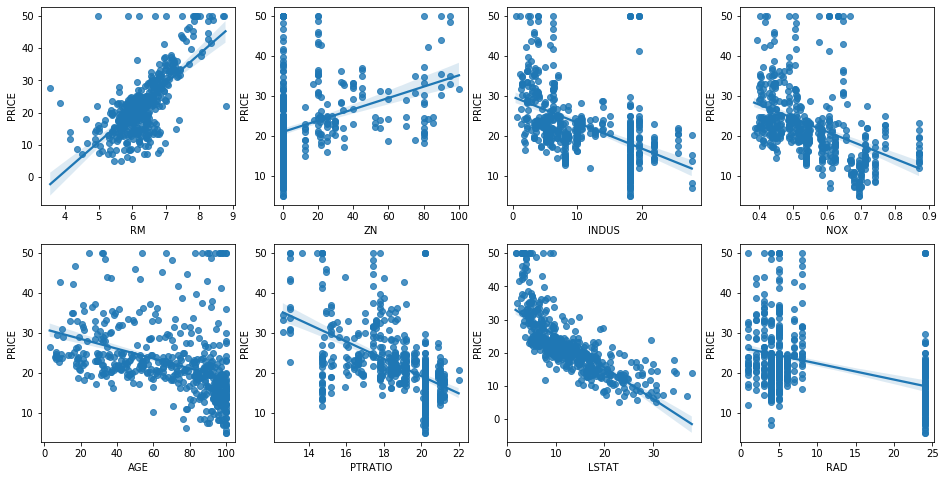

In [6]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize =(16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y='PRICE',data = bostonDF, ax = axs[row][col])

# - 단일 변수에 대한 선형 회귀

In [7]:
from sklearn.model_selection import train_test_split

x = bostonDF['RM']
y = boston.target   #y = bostonDF['PRICE']

X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2029)

In [8]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [9]:
# DT에서 하나의 컬럼만 가져오게 되면 시리즈로 변환이 되므로 가공 필요.
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# - 결과 예측하기

In [10]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

# - 결과 확인하기

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred)


0.3661562123069739

- 계수 w(weight) , 절편 b (bias)

In [12]:
sim_lr.coef_, sim_lr.intercept_

(array([9.4171277]), -36.41849250542624)

- 도출한 회귀식 : Price = 9.4171277 * RM -36.41849250542624

In [13]:
# 위의 결과값을 이용하여 직선과 산점도 표현하기

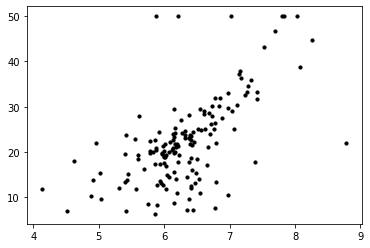

In [14]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.show()

In [15]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
line_y = sim_lr.predict(line_x.reshape(-1,1))

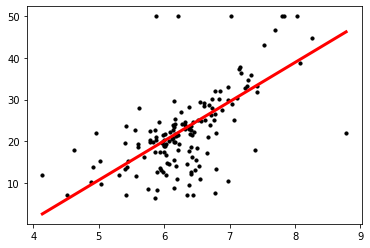

In [16]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.show()

In [17]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs * w + b


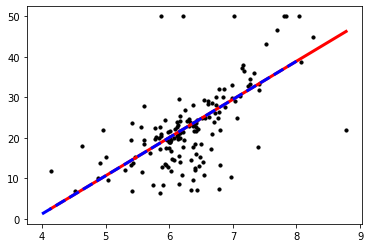

In [18]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.plot(xs,ys, c = 'blue', lw=3 ,ls ='--')
plt.show()

# LSTAT과 Price 비교

In [19]:
from sklearn.model_selection import train_test_split

x = bostonDF['LSTAT']
y = boston.target   #y = bostonDF['PRICE']

X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=19)


In [20]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [21]:
# DT에서 하나의 컬럼만 가져오게 되면 시리즈로 변환이 되므로 가공 필요.
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [23]:
r2_score(y_test,y_pred)

0.5197154926220184

In [24]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.8922435]), 33.591648794612624)

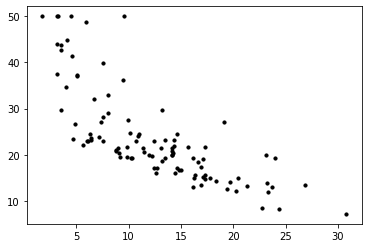

In [25]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.show()

In [26]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
line_y = sim_lr.predict(line_x.reshape(-1,1))

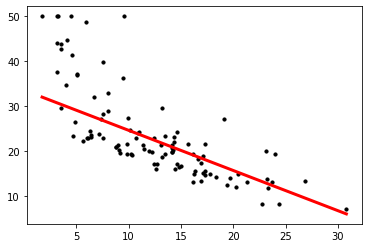

In [27]:
plt.scatter(X_test, y_test, s= 10, c='black')
plt.plot(line_x, line_y, c = 'red', lw = 3)
plt.show()

In [28]:
names = [i for i in bostonDF.columns[1:9]]

names

['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']

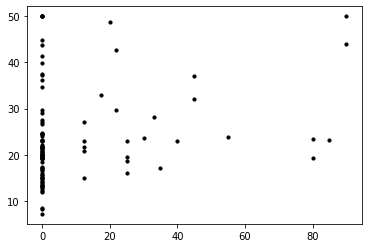

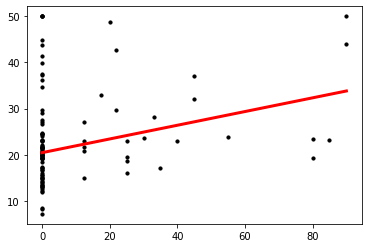

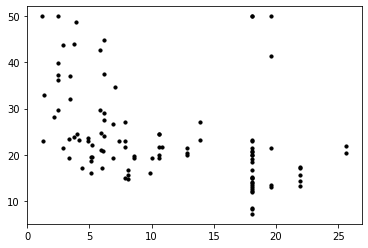

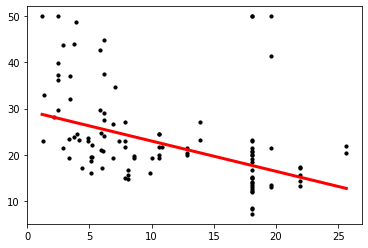

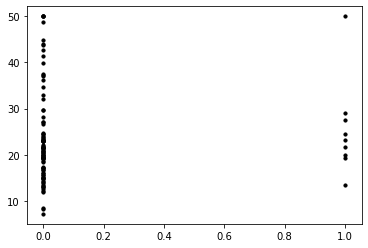

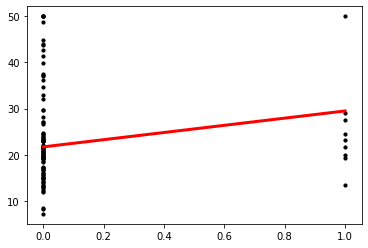

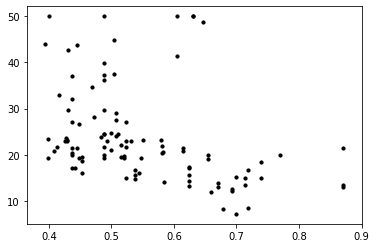

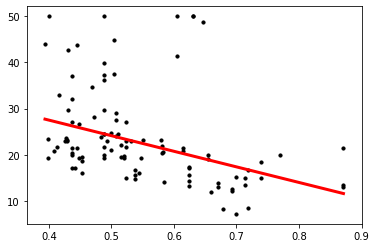

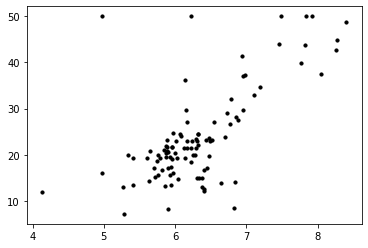

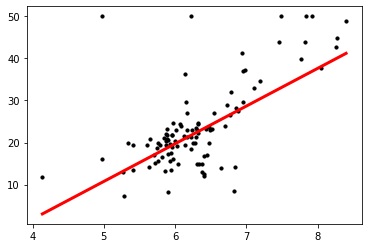

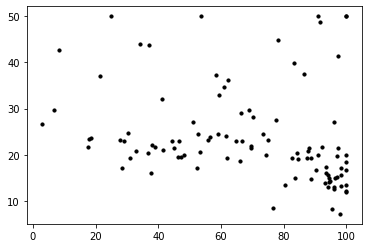

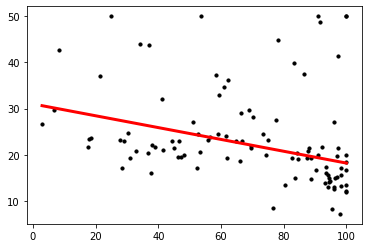

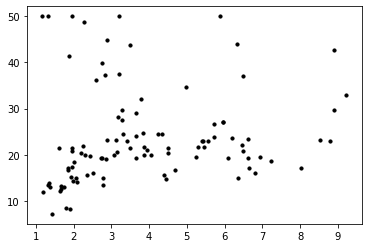

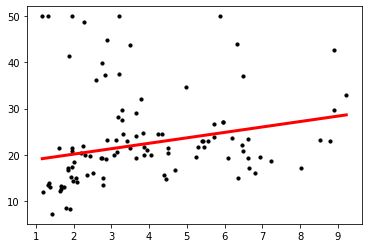

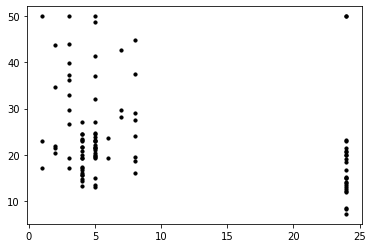

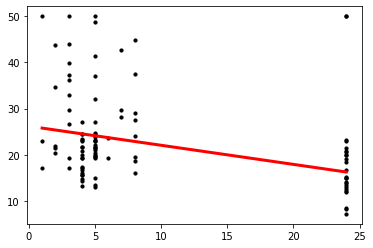

In [29]:
# 도전과제
# Seaborn의 8개 그래프를 우리가 했던 방식으로 해볼것.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for name in names:
    x = bostonDF[name]
    y = boston.target   #y = bostonDF['PRICE']

    X_train , X_test, y_train, y_test = train_test_split(  x
                                                         , y
                                                         , test_size = 0.2
                                                         , random_state=19)
    
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1,1))
    r2_score(y_test,y_pred)
    sim_lr.coef_, sim_lr.intercept_
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.show()
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
    line_y = sim_lr.predict(line_x.reshape(-1,1))
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.plot(line_x, line_y, c = 'red', lw = 3)
    plt.show()

In [30]:
### Price 와 LSTAT의 다양한 회귀 방법에 따른 RMSE 값

# Decisiono Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

dt_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = dt_regr.predict(X_test.values.reshape(-1,1))
rmse_regr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

# Support Vector Machine Regressor

In [32]:
from sklearn.svm import SVR
svm_regr = SVR()

svm_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
rmse_svm = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

# LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression

dt_lr = LinearRegression()
dt_lr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = dt_lr.predict(X_test.values.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)),2)

In [34]:
print (rmse_regr , rmse_svm, rmse_lr)

18.55 16.48 17.74


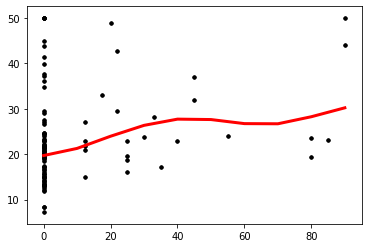

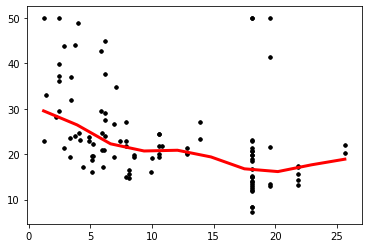

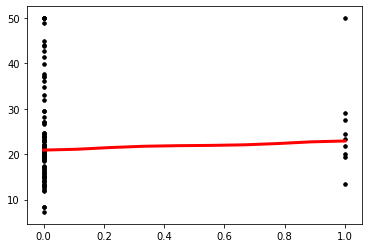

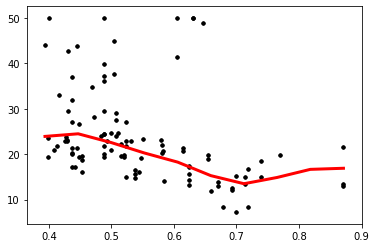

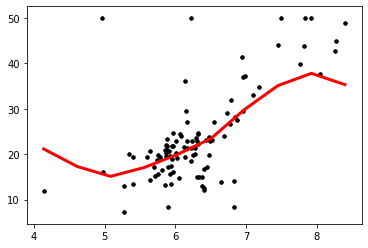

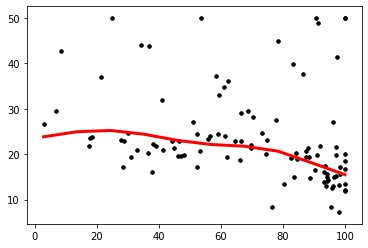

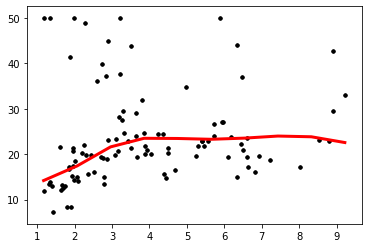

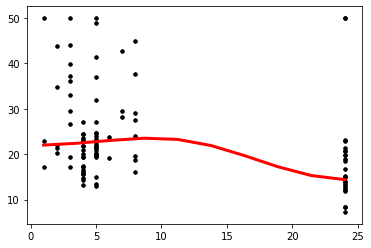

In [35]:
names = [i for i in bostonDF.columns[1:9]]

for name in names:
    x = bostonDF[name]
    y = boston.target   #y = bostonDF['PRICE']

    X_train , X_test, y_train, y_test = train_test_split(  x
                                                         , y
                                                         , test_size = 0.2
                                                         , random_state=19)
    
    
    svm_regr = SVR()
    svm_regr.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
    r2_score(y_test,y_pred)
    
    plt.scatter(X_test, y_test, s= 10, c='black')
    
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10 )
    line_y = svm_regr.predict(line_x.reshape(-1,1))
    plt.scatter(X_test, y_test, s= 10, c='black')
    plt.plot(line_x, line_y, c = 'red', lw = 3)
    plt.show()

### 다중회귀 06.22.

In [36]:
X_data = bostonDF.drop(['PRICE'], axis = 1 , inplace = False)
y_target = boston.target   #y = bostonDF['PRICE']

X_train , X_test, y_train, y_test = train_test_split(  X_data
                                                     , y_target
                                                     , test_size = 0.3
                                                     , random_state=156)


lr = LinearRegression()
lr.fit(X_train , y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)




# svm_regr = SVR()
# svm_regr.fit(X_train.values.reshape(-1,1), y_train)
# y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
# r2_score(y_test,y_pred)

In [37]:
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [38]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))
      

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [39]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = x.columns)
coeff.sort_values(ascending = False)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
from sklearn.model_selection import cross_val_score

x = bostonDF.drop(['PRICE'], axis = 1 , inplace = False)
y = boston.target   #y = bostonDF['PRICE']

lr= LinearRegression()

# cross_val_score ()로 5폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Nagative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} ' .format(avg_rmse))

In [ ]:
# 5.5 다항회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이ㅛㅇㅇ해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X = bostonDF['LSTAT']
Y = boston.target
pf = poly.fit_transform(X.values.reshape(-1,1))

In [ ]:
def polynomial_func(X):
    y = 1 + 2 *X[:,0] + 3* X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 :\n,' , y)

In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_ , 2))
print('Polynomial 회귀 shape :' , model.coef_.shape)

In [ ]:
from sklearn.preprocessing #314

In [ ]:
pf.shape

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(  X_data
                                                     , y_target
                                                     , test_size = 0.2
                                                     , random_state=2019)


pf_train = poly.fit_transform(X_train.values.reshape(-1,1))
pf_test = poly.fit_transform(X_test.values.reshape(-1,1))

In [ ]:
lr = LinearRegression()
lr.fit(pf_train , y_train)
y_pred = lr.predict(pf_test)

In [ ]:
# 릿지 회귀 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha= 10 으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 개별 RMSE : {0:.3f}'.format(avg_rmse))


In [ ]:
# Ridge 에 사용될 alpha 파라미터의 값을 정의
alphas = [0,0.1,1,10,100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE 를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

In [ ]:
# 각 alpha에 따른 회귀 계슈 값을 시각화하기 위해 4개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가. 
    ceoff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화 . 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs [pos])
    
    #for 문 바깥에서 맷플롭의 show 호출 밑 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()
    
    

In [ ]:
ceoff = pd.Series(data=ridge.coef_, index = X_data.columns)
coeff

5.7 로지스틱 회귀

In [ ]:
def sigmoid(x,w,b):
    return 1 /(1+np.exp(-(w*x+b)))

In [ ]:
xs = np.linspace(-5,5, 100)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y05 = sigmoid(xs, 0.5, 0)

plt.plot(xs, y1, lw = 2, c = 'k')
plt.plot(xs, y5, lw = 2, c = 'g')
plt.plot(xs, y05, lw = 2, c = 'r')

plt.show()

In [ ]:
xs = np.linspace(-5, 5, 100)
y0 = sigmoid(xs, 1, 0)
y2p = sigmoid(xs, 1, 2)
y2m = sigmoid(xs, 1, -2)

plt.plot(xs, y0, lw = 2, c = 'k')
plt.plot(xs, y2p, lw = 2, c = 'g')
plt.plot(xs, y2m, lw = 2, c = 'r')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StanderadScaler()로 평균이 0, 분산1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train, y_test = train_test_split(  data_scaled
                                                     , cancer.target
                                                     , test_size = 0.3
                                                     , random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'], 'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring = 'accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [ ]:
# RandomForestRegressor를 이용한 보스턴 주택 가격 예측수행

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
bostonDf = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0 , n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [ ]:
print(' 5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 개별 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    
    print('#### ' , model.__class__.__name__, '####')
    print(' 5 교차 검증의 평균  RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state= 0 , max_depth= 4)
rf_reg = RandomForestRegressor(random_state= 0 , n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators= 1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
#
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)
    

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다. 
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data= rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y= feature_series.index)